# Autoencoders 

In this notebook we build a simple auotencoder for Mnist data, and show how to use it for anomaly detection.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

Both the encoder and the decoder are just composed by a couple of dense layers.
The latent dimension is 16. This means that each input is reduced from an initial dimensions of 28*28=784 to a an internal dimension of just 16 floats.

Most of the relevant information is preserved, as testified by the fact that we are able to reconstruct, out of this 16 values, an image very similar to the original one.

In [2]:
# size of our encoded representations
encoding_dim = 16
mid_dim = 64

# input placeholder
input_img = layers.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(mid_dim, activation='relu')(input_img)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(mid_dim, activation='relu')(encoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [3]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,328 (403.62 KB)

 Trainable params: 103,328 (403.62 KB)

 Non-trainable params: 0 (0.00 B)

We can now compile the model. 

As loss function we can take mse or categorical crossentropy, as you prefer. 

In [18]:
adam = Adam(lr=0.001)
autoencoder.compile(optimizer=adam, loss='mse')

We now load the dataset, and normalize it in the range [0,1]. We are not using labels.

In [5]:
from keras.datasets import mnist
import numpy as np

# im,port dataset
(x_train, _), (x_test, _) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

# normalize all values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


Time to fit the model. Observe that the ground truth we need to compare with is in this case the input itself. In other words, the loss is the distance between the inout $X$ and its reconstruction $\hat{X}$

In [7]:
# compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# fit the autoencoder 
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1046 - val_loss: 0.0403
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0377 - val_loss: 0.0303
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0294 - val_loss: 0.0256
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0253 - val_loss: 0.0229
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0228 - val_loss: 0.0210
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0212 - val_loss: 0.0202
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0204 - val_loss: 0.0197
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0200 - val_loss: 0.0194
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0197 - val_loss: 0.0190
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0194 - val_loss: 0.0189
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0192 - val_loss: 0.0185
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/st

Let us check the result.

First of all we conpute all reconstructions for images in the test set.

In [8]:
# show the result of the reconstruction
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Now we can plot the result. We pick ten random images, and for each of them we show the original and the reconstruction obtained from the autoencoder.

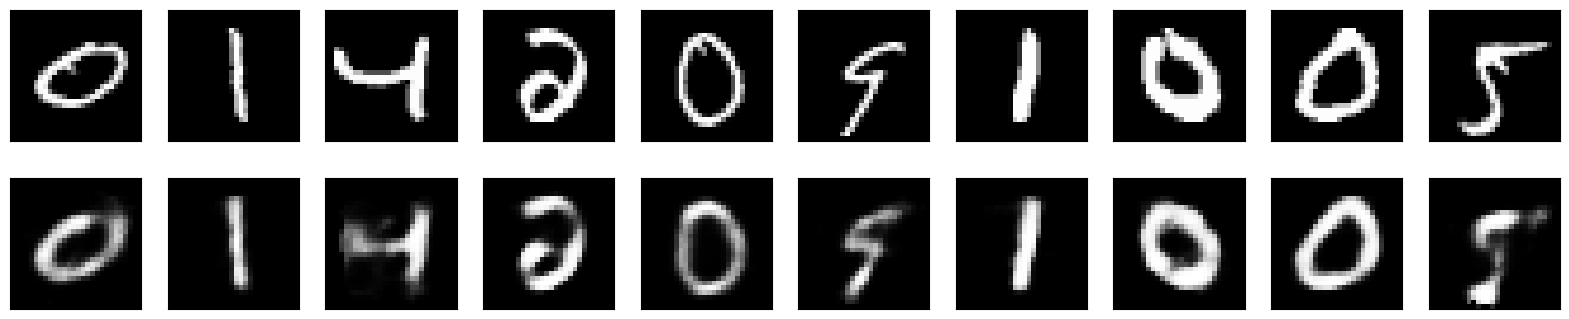

In [9]:
import matplotlib.pyplot as plt

n = 10 # number of images to plot
imgs = np.random.randint(low=0,high=10000,size=n) # select n images randomly
plt.figure(figsize=(20, 4))
for (i,idx) in enumerate(imgs):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Anomaly detection

We want now to show how we can use an autoencoder for anomaly detection.

The genral idea is that the encoding learned by the autoenoder is data-specific. This means that if we apply the autoencoder to an outlier, the resulting reconstruction should be sensibily worse than usual, and we may exploit this simple fact to detect the anomaly.

The first step of the procedure is to identify the canonical expected reconstruction error on true data, and the associated standard deviation.

In [10]:
mse_all = np.mean(np.square(decoded_imgs - x_test),axis=1) # mean error for each input
print(mse_all.shape) 
mse = np.mean(mse_all) # mean of the mean squared error for all inputs
std = np.std(mse_all) # standard deviation of the mean squared error for all inputs
print("mse is {}, with a standard deviation of {}".format(mse,std))

(10000,)
mse is 0.017031598836183548, with a standard deviation of 0.009140183217823505


Now we create an "anomaly". We simply take a normal image from the dataset, and rotate it of 90 degrees. 

For this example, we use image no 15 in the test set.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0301
0.0301235169172287


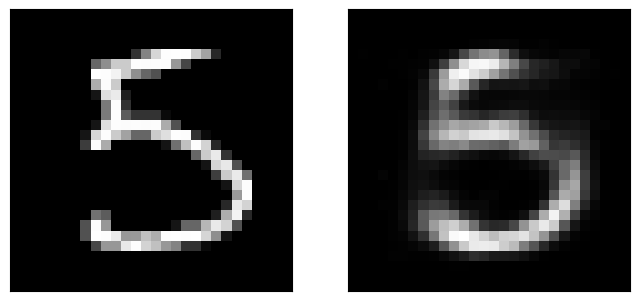

In [11]:
test = x_test[15].reshape(1,784) # select randomly an image from the dataset
print(autoencoder.evaluate(test,test)) # return the mse between the input and the reconstruction

plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
plt.imshow(x_test[15].reshape(28, 28)) # original
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[15].reshape(28, 28)) # reconstructed 
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

Observe that the reconstruction is not particularly good, but still the loss (0.207) is more or less on std away from the mean, that is a normal behaviour.

Now, let us rotate it and repeat the computation.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0464
0.046442240476608276


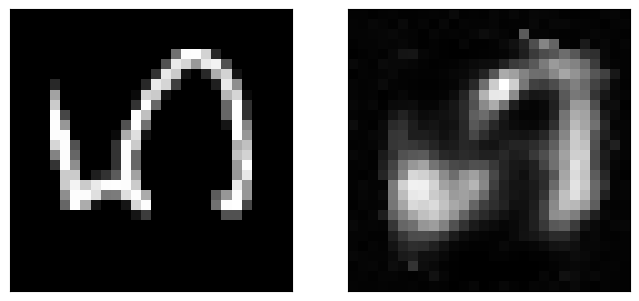

In [13]:
# rotate the test image 
rotated = np.rot90(x_test[15].reshape(28,28))
predicted = autoencoder.predict(rotated.reshape(1,784))[0].reshape(28,28)

plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
plt.imshow(rotated) # rotated image 
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(1, 2, 2)
plt.imshow(predicted) # reconstruction
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
mse = np.mean(np.square(predicted-rotated))
print("mse is {}".format(mse))

mse is 0.046442244201898575


The mse in this case is 0.052, more than 3 std away form the mean, that is surely an anomaly!!

Let us finally observe that, instead of using mean and variance of reconstruction errors, we could have directly worked in the latent space.

In fact, autoencoders generalize Principal Component Ananlysis, extracting relevant, non linear combinations of the input features. Any anomaly will 
sensibibly discost from canonical values of the latent encoding.